# Basic Sentiment Analysis Project

Based on the guided project by Amit Yadav on Coursera

# The IMDB Review Dataset

In [1]:
from tensorflow.python.keras.datasets import imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

In [2]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
print(y_train[0])

1


In [4]:
print(x_test[0])

[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]


In [5]:
print(y_test[0])

0


In [6]:
class_names = ['Negative', 'Positive']

In [7]:
word_index = imdb.get_word_index()
print(word_index['hello'])

4822


# Decoding the Reviews

In [8]:
reverse_word_index = dict((value, key) for key, value in word_index.items())

def decode(review):
    text = ''
    for i in review:
        text += reverse_word_index[i]
        text += ''
    return text
decode(x_train[0])

"theasyouwithoutthemselvespowerfulletslovestheirbecomesreachinghadjournalistoflotfromanyonetohaveafteroutatmospherenevermoreroomanditsoheartshowstoyearsofeverynevergoingandhelpmomentsorofeverychestvisualmovieexceptherwasseveralofenoughmorewithisnowcurrentfilmasyouofminepotentiallyunfortunatelyofyouthanhimthatwithoutthemselveshergetforwascampofyoumoviesometimesmoviethatwithscarybutandtostorywonderfulthatinseeingincharactertoof70smusicianswithhearthadshadowstheyofherethatwithherserioustohavedoeswhenfromwhywhathavecriticstheyisyouthatisn'tonewillverytoasitselfwithotherandinofseenoverlandedforanyoneofandbrshow'stowhetherfromthanoutthemselveshistoryhenamehalfsomebrofandoddwastwomostofmeanfor1anyanboatsheheshouldisthoughtfrogbutofscriptyounotwhilehistoryhehearttorealatbarrelbutwhenfromonebitthenhavetwoofscripttheirwithhernobodymostthatwithwasn'ttowitharmedactingwatchanforwithheartfeltfilmwantan"

In [9]:
def show_len():
    print('Length of the 1st training example: ', len(x_train[0]))
    print('Length of the 2nd training example: ', len(x_train[1]))
    print('Length of the 1st testing example: ', len(x_test[0]))
    print('Length of the 2nd testing example: ', len(x_test[1]))
    
show_len()

Length of the 1st training example:  218
Length of the 2nd training example:  189
Length of the 1st testing example:  68
Length of the 2nd testing example:  260


# Padding the Examples

Removing the differences in the training and test examples

In [10]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value = word_index['the'], padding = 'post', maxlen = 256)
x_test = pad_sequences(x_test, value = word_index['the'], padding = 'post', maxlen = 256)

In [11]:
show_len()

Length of the 1st training example:  256
Length of the 2nd training example:  256
Length of the 1st testing example:  256
Length of the 2nd testing example:  256


In [12]:
decode(x_train[0])

"theasyouwithoutthemselvespowerfulletslovestheirbecomesreachinghadjournalistoflotfromanyonetohaveafteroutatmospherenevermoreroomanditsoheartshowstoyearsofeverynevergoingandhelpmomentsorofeverychestvisualmovieexceptherwasseveralofenoughmorewithisnowcurrentfilmasyouofminepotentiallyunfortunatelyofyouthanhimthatwithoutthemselveshergetforwascampofyoumoviesometimesmoviethatwithscarybutandtostorywonderfulthatinseeingincharactertoof70smusicianswithhearthadshadowstheyofherethatwithherserioustohavedoeswhenfromwhywhathavecriticstheyisyouthatisn'tonewillverytoasitselfwithotherandinofseenoverlandedforanyoneofandbrshow'stowhetherfromthanoutthemselveshistoryhenamehalfsomebrofandoddwastwomostofmeanfor1anyanboatsheheshouldisthoughtfrogbutofscriptyounotwhilehistoryhehearttorealatbarrelbutwhenfromonebitthenhavetwoofscripttheirwithhernobodymostthatwithwasn'ttowitharmedactingwatchanforwithheartfeltfilmwantanthethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethe

# Word Embedding

The main difference between One Hot Encoding and Word Embedding is :
One Hot encoding takes every word independently hence cannot extrapolate the learning based on how two or more words can be used together
Word embedding is computationally more efficient since it can extrapolate the learning based on the words that are used together so as to get the desired readings.

# Creating and Training the Model

In [13]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
    Embedding(10000, 16),
    GlobalAveragePooling1D(),
    Dense(16, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [14]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20

history = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

# Predictions and Evaluation

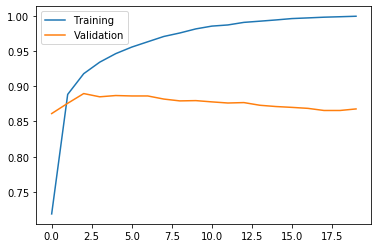

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(E) ,history.history['accuracy'], label = 'Training')
plt.plot(range(E) ,history.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.show()

In [16]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy is:', acc*100)

25000/25000 [==============================] - 2s 62us/sample - loss: 0.9221 - accuracy: 0.8435
Test set accuracy is: 84.34799909591675


In [17]:
import numpy as np

p = model.predict(np.expand_dims(x_test[0], axis = 0))
print(class_names[np.argmax(p[0])])

Negative


In [18]:
decode(x_test[0])

"thewonderownasbyissequenceiiandandtoofhollywoodbrofdownshoutinggettingboringofeveritsadlysadlysadlyiiwasthendoesdon'tclosefaintafteronecarryasbyarebefavouritesallfamilyturnindoesasthreepartinanothersometobeprobablywithworldandheranhavefaintbeginningownasissequencethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethethe"